In [10]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

In [14]:
btc = yf.download('BTC-USD', start='2024-01-04', end='2024-12-31', interval='1h')
btc.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
btc

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Datetime,,,,,
2024-01-04 00:00:00+00:00,42894.542969,42980.855469,42795.792969,42855.816406,0
2024-01-04 01:00:00+00:00,42743.269531,42952.648438,42675.175781,42905.238281,98971648
2024-01-04 02:00:00+00:00,43200.941406,43200.941406,42737.222656,42737.222656,228765696
2024-01-04 03:00:00+00:00,43119.531250,43230.191406,43047.968750,43169.640625,263843840
2024-01-04 04:00:00+00:00,43181.445312,43208.667969,43009.796875,43134.488281,164605952
...,...,...,...,...,...
2024-12-30 19:00:00+00:00,94291.046875,94480.593750,93872.414062,94480.593750,784154624
2024-12-30 20:00:00+00:00,94189.796875,94835.937500,94189.796875,94318.726562,1046925312
2024-12-30 21:00:00+00:00,92078.101562,94225.703125,91788.617188,94201.390625,1496473600


In [34]:
env = gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)

In [35]:
env.action_space

Discrete(2)

(array([[ 4.2743270e+04, -1.5127344e+02],
       [ 4.3200941e+04,  4.5767188e+02],
       [ 4.3119531e+04, -8.1410156e+01],
       [ 4.3181445e+04,  6.1914062e+01],
       [ 4.3209918e+04,  2.8472656e+01]], dtype=float32), {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>})
info {'total_reward': -707.984375, 'total_profit': 0.738965089497399, 'position': <Positions.Short: 0>}


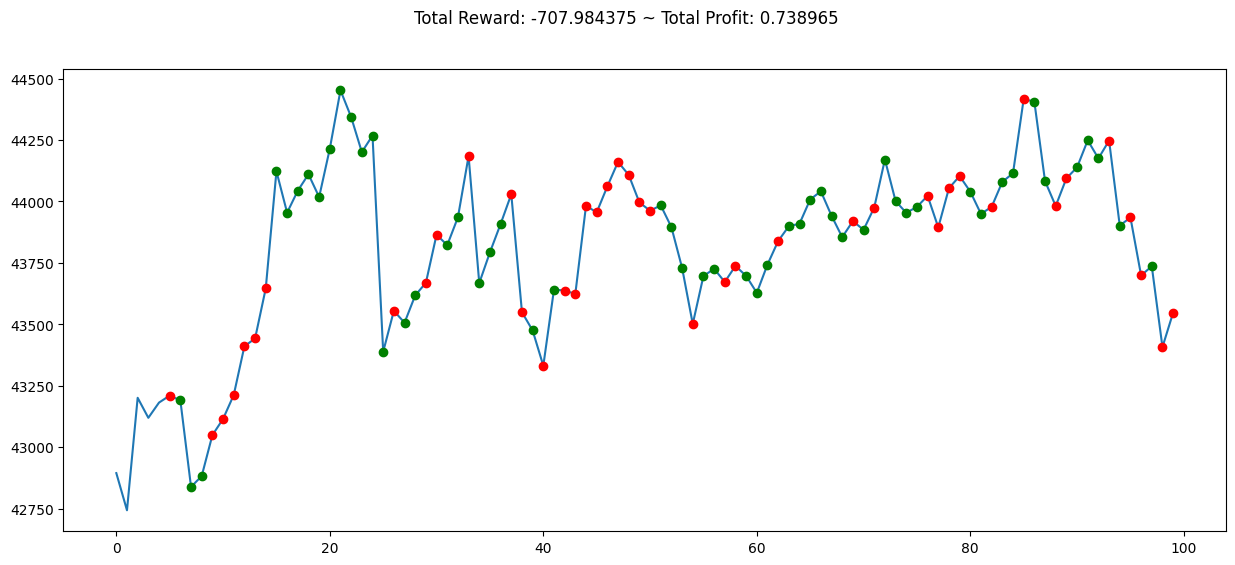

In [38]:
state = env.reset()
print(state)
while True: 
    action = env.action_space.sample()
    n_state, reward, ter, trun, info = env.step(action)
    if trun: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

In [39]:
env_maker = lambda: gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [43]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 931      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0.0117   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 165      |
|    value_loss         | 5.86e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 926      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -39.8    |
|    value_loss      

KeyboardInterrupt: 

In [50]:
env = gym.make('stocks-v0', df=btc, frame_bound=(-200,-1), window_size=5)
obs,info = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, reward, ter, trun, info = env.step(action)
    if trun:
        print("info", info)
        break

info {'total_reward': -155.53125, 'total_profit': 0.48448890193219, 'position': <Positions.Short: 0>}


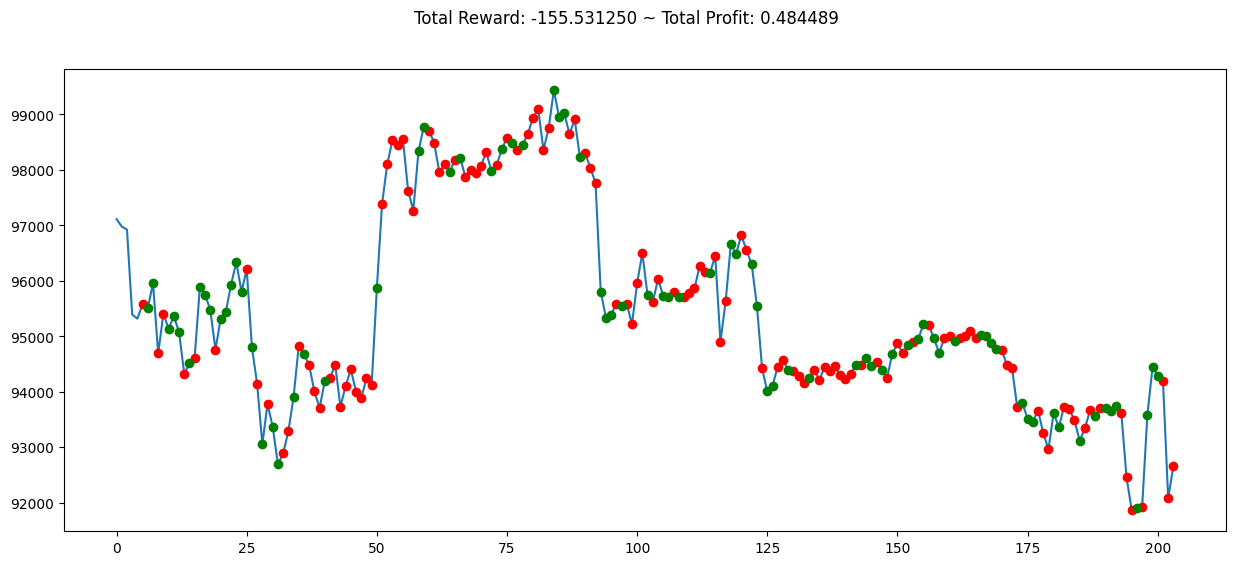

In [51]:
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()